In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
chemFile=xr.open_dataset('F:/Data/case_anqing/compressed_chem.nc')
metFile=xr.open_dataset('F:/Data/case_anqing/compressed_met.nc')

In [4]:
lat=chemFile.latitude
lon=chemFile.longitude

O3_L1=np.squeeze(chemFile.O3.sel(level=1000,method='nearest'))

uw_L1=np.squeeze(metFile.uwind.sel(level=1000,method='nearest'))
vw_L1=np.squeeze(metFile.vwind.sel(level=1000,method='nearest'))


print('lat & lon = ',lat.shape)
print('chem      = ',O3_L1.shape)

lat & lon =  (138, 135)
chem      =  (672, 138, 135)


In [5]:
# calculate MDA8 O3
mda8_L1 = O3_L1.rolling(time=8).mean().resample({'time':'D'}).max(dim='time')

# calculate average uv wind
uuL1 = uw_L1.resample({'time':'D'}).mean(dim='time')
vvL1 = vw_L1.resample({'time':'D'}).mean(dim='time')

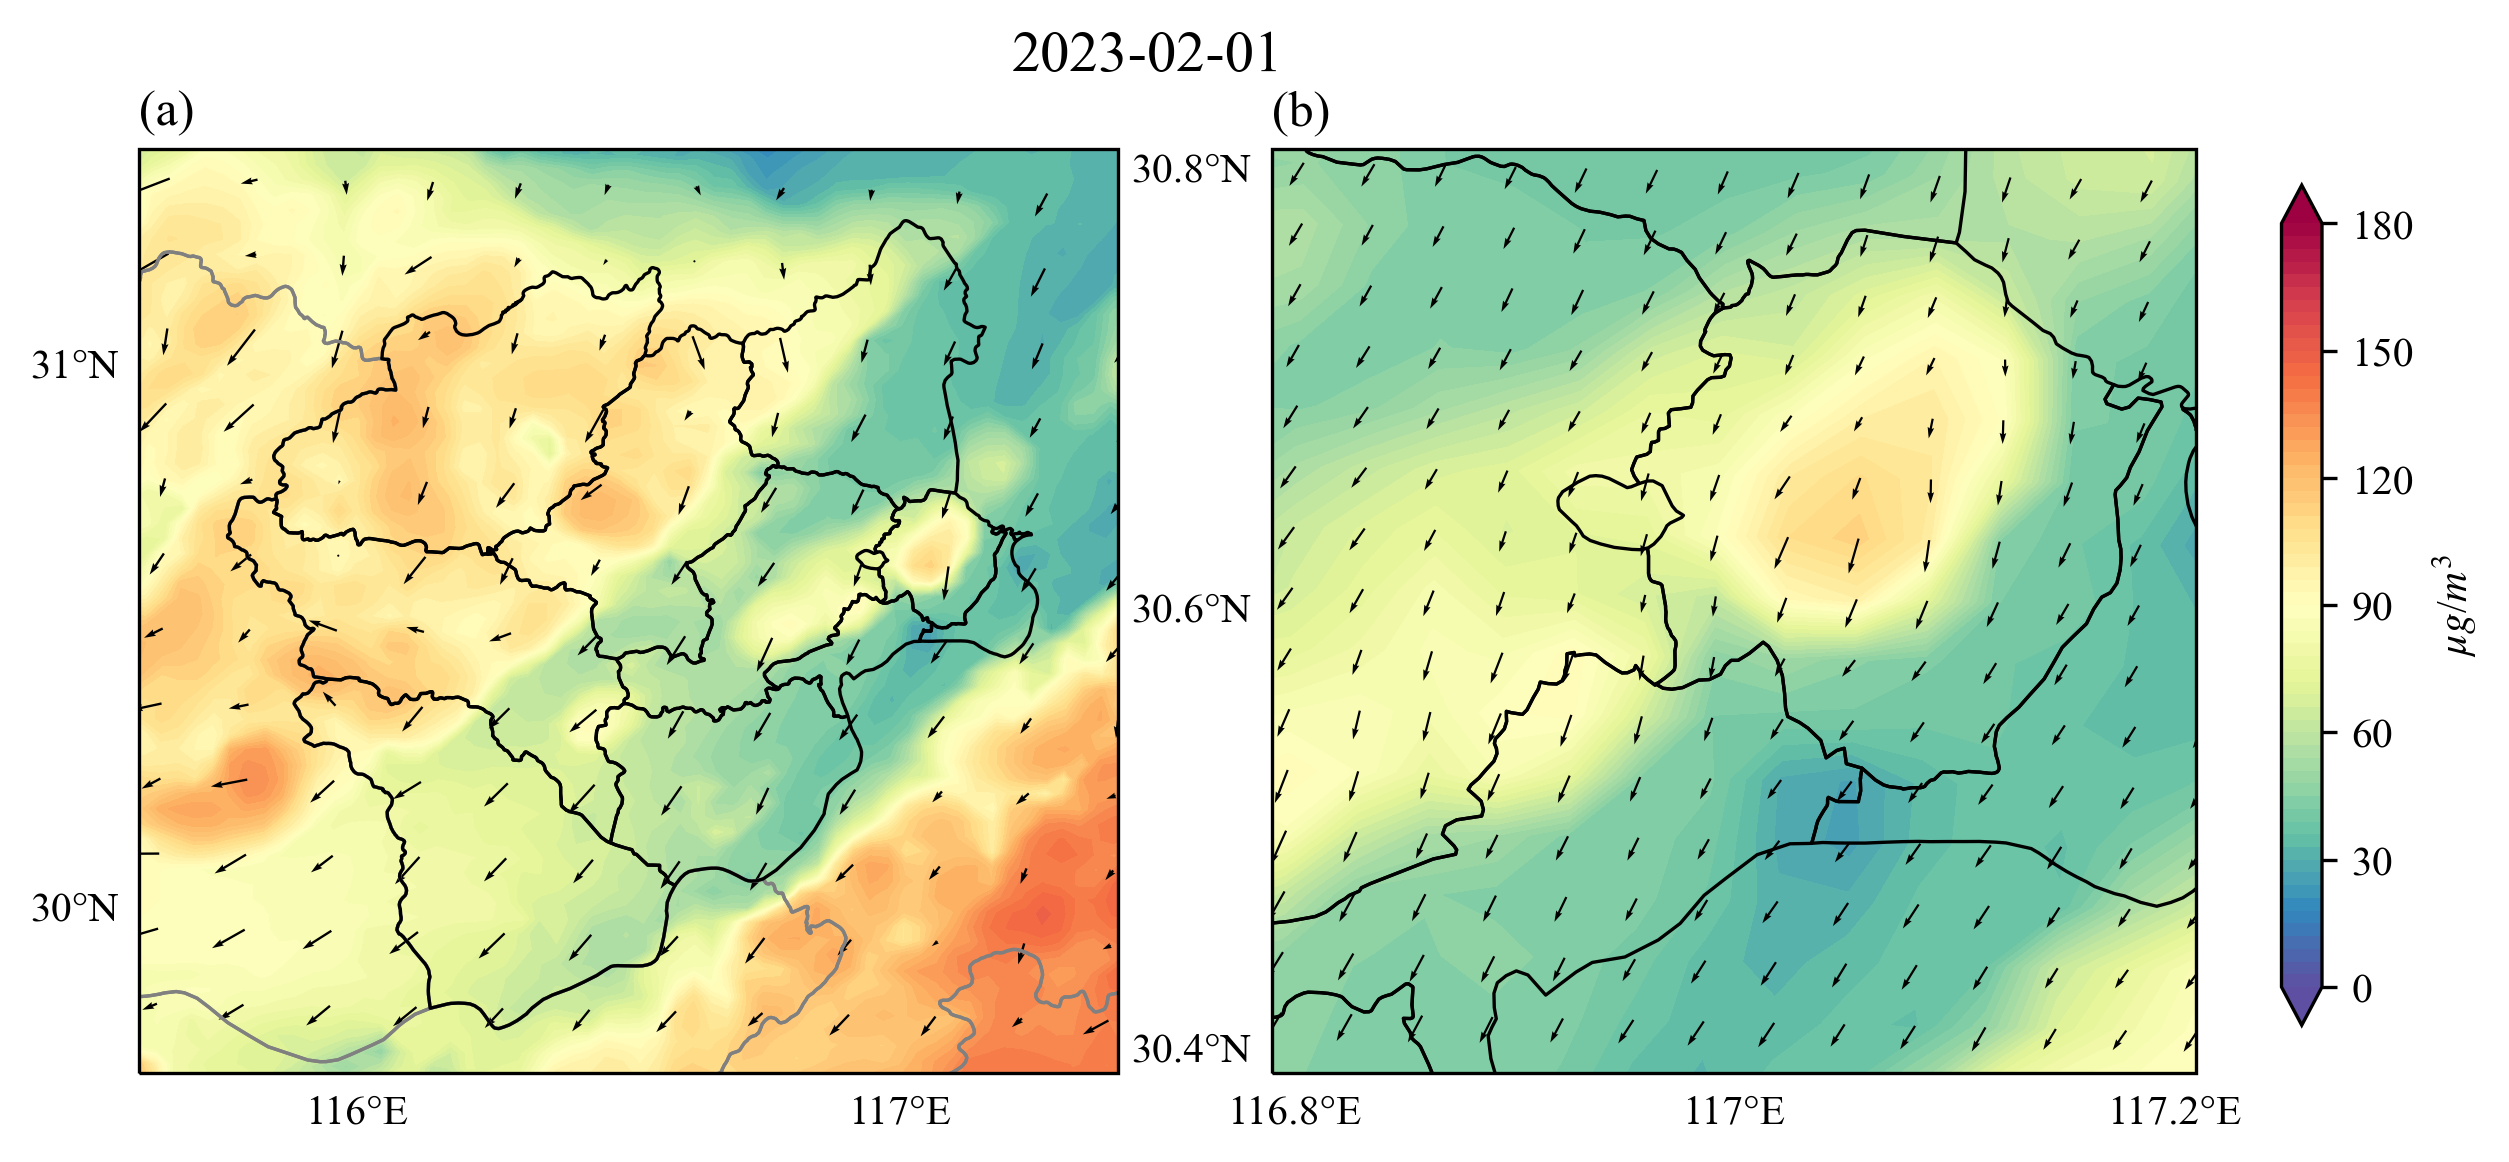

In [11]:
date=1
cmax=181
cmaplevel=np.arange(0,cmax,3)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
ax = fig.subplots(1,2,subplot_kw={'projection':proj})

shp_aq = Reader('F:/Data/case_anqing/shapefile/Anqing_district/anqing_district.shp')
shp_pro = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/2. Province/province.shp')
for i in range(2):
    ax[i].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.8)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=0.8)

ax[0].set_extent([115.6, 117.4, 29.7, 31.4],ccrs.PlateCarree()) # anqing
gl=ax[0].gridlines(
    xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

ax[1].set_extent([116.79, 117.21, 30.39, 30.81],ccrs.PlateCarree()) # anqing
gl=ax[1].gridlines(
    xlocs=np.arange(-180, 180 + 1, 0.2), ylocs=np.arange(-90, 90 + 1, 0.2),
    draw_labels=True, x_inline=False, y_inline=False,
    linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

xgrid=np.size(uuL1,2)
ygrid=np.size(vvL1,1)
ngrid=5
ngrid2=1

# contour map
cmap=ax[0].contourf(lon,lat,mda8_L1[date-1,:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax[1].contourf(lon,lat,mda8_L1[date-1,:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

# wind quiver
ax[0].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
        uuL1[date-1,0:ygrid:ngrid,0:xgrid:ngrid],vvL1[date-1,0:ygrid:ngrid,0:xgrid:ngrid],
        transform=proj,color='k',alpha=1,scale=150,headwidth=3)
ax[1].quiver(lon[0:ygrid:ngrid2,0:xgrid:ngrid2],lat[0:ygrid:ngrid2,0:xgrid:ngrid2],
        uuL1[date-1,0:ygrid:ngrid2,0:xgrid:ngrid2],vvL1[date-1,0:ygrid:ngrid2,0:xgrid:ngrid2],
        transform=proj,color='k',alpha=1,scale=150,headwidth=3)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.12)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+1,30))
cbar.set_label('$\mu$$g$/$m^3$')

ax[0].set_title('(a)',loc='left')
ax[1].set_title('(b)',loc='left')
plt.suptitle(pd.to_datetime('2023-02-'+str(date)).strftime('%Y-%m-%d'),size=14)

plt.show()

In [12]:
dates=np.arange(4,13)
cmax=181
cmaplevel=np.arange(0,cmax,3)
proj=ccrs.PlateCarree()

for date in dates:
    fig = plt.figure(figsize=(9,4),dpi=300)
    ax = fig.subplots(1,2,subplot_kw={'projection':proj})

    shp_aq = Reader('F:/Data/case_anqing/shapefile/Anqing_district/anqing_district.shp')
    shp_pro = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/2. Province/province.shp')
    for i in range(2):
        ax[i].add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.8)
        ax[i].add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=0.8)

    ax[0].set_extent([115.6, 117.4, 29.7, 31.4],ccrs.PlateCarree()) # anqing
    gl=ax[0].gridlines(
        xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False

    ax[1].set_extent([116.79, 117.21, 30.39, 30.81],ccrs.PlateCarree()) # anqing
    gl=ax[1].gridlines(
        xlocs=np.arange(-180, 180 + 1, 0.2), ylocs=np.arange(-90, 90 + 1, 0.2),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False

    xgrid=np.size(uuL1,2)
    ygrid=np.size(vvL1,1)
    ngrid=5
    ngrid2=1

    # contour map
    cmap=ax[0].contourf(lon,lat,mda8_L1[date-1,:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
    cmap=ax[1].contourf(lon,lat,mda8_L1[date-1,:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')

    # wind quiver
    ax[0].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
            uuL1[date-1,0:ygrid:ngrid,0:xgrid:ngrid],vvL1[date-1,0:ygrid:ngrid,0:xgrid:ngrid],
            transform=proj,color='k',alpha=1,scale=150,headwidth=3)
    ax[1].quiver(lon[0:ygrid:ngrid2,0:xgrid:ngrid2],lat[0:ygrid:ngrid2,0:xgrid:ngrid2],
            uuL1[date-1,0:ygrid:ngrid2,0:xgrid:ngrid2],vvL1[date-1,0:ygrid:ngrid2,0:xgrid:ngrid2],
            transform=proj,color='k',alpha=1,scale=150,headwidth=3)

    # share colorbar
    fig.subplots_adjust(right=0.9,wspace=0.12)
    position= fig.add_axes([0.92,0.15,0.015,0.7])
    cbar=fig.colorbar(cmap,cax=position)
    cbar.set_ticks(np.arange(0,cmax+1,30))
    cbar.set_label('$\mu$$g$/$m^3$')

    ax[0].set_title('(a)',loc='left')
    ax[1].set_title('(b)',loc='left')
    plt.suptitle(pd.to_datetime('2023-02-'+str(date)).strftime('%Y-%m-%d'),size=14)
    plt.savefig('D:/Download/New_'+pd.to_datetime('2023-02-'+str(date)).strftime('%Y-%m-%d'))
    print('saving MDA8 on '+pd.to_datetime('2023-02-'+str(date)).strftime('%Y-%m-%d'))

# plt.show()

saving MDA8 on 2023-02-04
saving MDA8 on 2023-02-05
saving MDA8 on 2023-02-06
saving MDA8 on 2023-02-07
saving MDA8 on 2023-02-08
saving MDA8 on 2023-02-09
saving MDA8 on 2023-02-10
saving MDA8 on 2023-02-11
saving MDA8 on 2023-02-12
